DATA COLLECTION

In [2]:
import os 
from kaggle.api.kaggle_api_extended import KaggleApi

# set the environment varaible to the directory containing kaggle.jason
os.environ["KAGGLE_CONFIG_DIR"] = r"C:/Users/fokee/Documents/hackathon1/final project"

def download_wildfire_prediction_dataset():
    # create an instance of the kaggle API 
    api = KaggleApi()
    api.authenticate()
    
    # define the Dataset to download 
    dataset = "imtkaggleteam/wildfires"

    # download the dataset 
    api.dataset_download_files(dataset, path='.', unzip=True)
    print('Download complete.')

# call the function to download the dataset 
download_wildfire_prediction_dataset()

Dataset URL: https://www.kaggle.com/datasets/imtkaggleteam/wildfires
Download complete.



DATA PROCESSING 

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
url = "C:/Users/fokee/Documents/hackathon1/final project/1- cumulative-area-burnt-by-wildfires-by-week.csv"
data = pd.read_csv(url)

In [5]:
data.head()

,Entity,Code,Year,Cumulative area burnt by wildfires in 2024,Cumulative area burnt by wildfires in 2023,Cumulative area burnt by wildfires in 2022,Cumulative area burnt by wildfires in 2021,Cumulative area burnt by wildfires in 2020,Cumulative area burnt by wildfires in 2019,Cumulative area burnt by wildfires in 2018,Cumulative area burnt by wildfires in 2017,Cumulative area burnt by wildfires in 2016,Cumulative area burnt by wildfires in 2015,Cumulative area burnt by wildfires in 2014,Cumulative area burnt by wildfires in 2013,Cumulative area burnt by wildfires in 2012
0,Afghanistan,AFG,1,391.0,0,0,1246,0,0,117,0,0,368,0,0,0
1,Afghanistan,AFG,2,559.0,0,0,2680,963,20,117,82,0,425,426,0,0
2,Afghanistan,AFG,3,841.0,0,0,3539,1181,20,264,129,390,425,426,54,0
3,Afghanistan,AFG,4,841.0,0,0,3719,2030,20,411,129,390,425,426,362,368
4,Afghanistan,AFG,5,841.0,0,215,4131,3351,20,411,129,1043,425,426,379,597


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13416 entries, 0 to 13415
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      13416 non-null  object 
 1   Code                                        13104 non-null  object 
 2   Year                                        13416 non-null  int64  
 3   Cumulative area burnt by wildfires in 2024  3870 non-null   float64
 4   Cumulative area burnt by wildfires in 2023  13416 non-null  int64  
 5   Cumulative area burnt by wildfires in 2022  13416 non-null  int64  
 6   Cumulative area burnt by wildfires in 2021  13416 non-null  int64  
 7   Cumulative area burnt by wildfires in 2020  13416 non-null  int64  
 8   Cumulative area burnt by wildfires in 2019  13416 non-null  int64  
 9   Cumulative area burnt by wildfires in 2018  13416 non-null  int64  
 10  Cumulative

In [7]:
print(data.isnull().sum())

Entity                                           0
Code                                           312
Year                                             0
Cumulative area burnt by wildfires in 2024    9546
Cumulative area burnt by wildfires in 2023       0
Cumulative area burnt by wildfires in 2022       0
Cumulative area burnt by wildfires in 2021       0
Cumulative area burnt by wildfires in 2020       0
Cumulative area burnt by wildfires in 2019       0
Cumulative area burnt by wildfires in 2018       0
Cumulative area burnt by wildfires in 2017       0
Cumulative area burnt by wildfires in 2016       0
Cumulative area burnt by wildfires in 2015       0
Cumulative area burnt by wildfires in 2014       0
Cumulative area burnt by wildfires in 2013       0
Cumulative area burnt by wildfires in 2012       0
dtype: int64


In [8]:
#Drop rows with missing values in critical columns
data.dropna(subset=['Cumulative area burnt by wildfires in 2024', 'Year'], inplace=True)

In [9]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [10]:
print("Columns in the CSV file:")
(data.columns.tolist())

Columns in the CSV file:


['Entity',
 'Code',
 'Year',
 'Cumulative area burnt by wildfires in 2024',
 'Cumulative area burnt by wildfires in 2023',
 'Cumulative area burnt by wildfires in 2022',
 'Cumulative area burnt by wildfires in 2021',
 'Cumulative area burnt by wildfires in 2020',
 'Cumulative area burnt by wildfires in 2019',
 'Cumulative area burnt by wildfires in 2018',
 'Cumulative area burnt by wildfires in 2017',
 'Cumulative area burnt by wildfires in 2016',
 'Cumulative area burnt by wildfires in 2015',
 'Cumulative area burnt by wildfires in 2014',
 'Cumulative area burnt by wildfires in 2013',
 'Cumulative area burnt by wildfires in 2012']

HYPOTESIS TESTING

In [11]:
from scipy import stats

def hypothesis_test(url, known_value, Year=None, alpha=0.05):
    # Load the data
    data = pd.read_csv(url)

    # Filter the DataFrame for a specific Year if provided
    if Year is not None:
        data = data[data['Year'] == Year]

    # Check if 'Cumulative area burnt by wildfires in 2024' column exists
    if 'Cumulative area burnt by wildfires in 2024' not in data.columns:
        print("'Cumulative area burnt by wildfires in 2024' column does not exist in the DataFrame.")
        return

    # Step 1: Define the sample data
    sample_data = data['Cumulative area burnt by wildfires in 2024'].dropna()  # Remove any NaN values

    # Step 2: Conduct the t-test
    t_statistic, p_value = stats.ttest_1samp(sample_data, known_value)

    # Step 3: Print the results
    print(f"T-statistic: {t_statistic}, P-value: {p_value}")

    # Step 4: Decision based on the p-value
    if p_value < alpha:
        print(f"Reject the null hypothesis: The average area burnt is significantly different from {known_value}.")
    else:
        print(f"Fail to reject the null hypothesis: The average area burnt is not significantly different from {known_value}.")

# Example usage
url = r'C:/Users/fokee/Documents/hackathon1/final project/1- cumulative-area-burnt-by-wildfires-by-week.csv'
hypothesis_test(url, known_value=1000, Year=5) 

T-statistic: 2.2989662029517945, P-value: 0.02230952616295915
Reject the null hypothesis: The average area burnt is significantly different from 1000.


SUMMARY STATISTICS

In [12]:
# Display summary statistics
print("\nSummary Statistics:")
(data.describe())



Summary Statistics:


,Year,Cumulative area burnt by wildfires in 2024,Cumulative area burnt by wildfires in 2023,Cumulative area burnt by wildfires in 2022,Cumulative area burnt by wildfires in 2021,Cumulative area burnt by wildfires in 2020,Cumulative area burnt by wildfires in 2019,Cumulative area burnt by wildfires in 2018,Cumulative area burnt by wildfires in 2017,Cumulative area burnt by wildfires in 2016,Cumulative area burnt by wildfires in 2015,Cumulative area burnt by wildfires in 2014,Cumulative area burnt by wildfires in 2013,Cumulative area burnt by wildfires in 2012
count,3870.000000,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03,3.870000e+03
mean,8.000000,6.250834e+05,5.763277e+05,6.300395e+05,6.280847e+05,7.764000e+05,6.466360e+05,4.512969e+05,6.031989e+05,7.226282e+05,6.997432e+05,6.696031e+05,6.685829e+05,4.460189e+05
std,4.321052,4.542569e+06,4.270699e+06,4.641563e+06,4.760902e+06,5.713116e+06,4.656613e+06,3.287675e+06,4.478535e+06,5.316351e+06,5.148524e+06,4.880116e+06,4.830465e+06,3.469629e+06
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000,1.565000e+02,1.190000e+02,3.165000e+02,1.980000e+02,3.330000e+02,2.860000e+02,0.000000e+00,2.060000e+02,3.240000e+02,3.420000e+02,1.980000e+02,1.860000e+02,0.000000e+00
75%,12.000000,1.696175e+04,1.916550e+04,2.121225e+04,1.676300e+04,2.077075e+04,2.023025e+04,1.302600e+04,1.834975e+04,1.974125e+04,1.935700e+04,1.759450e+04,1.864175e+04,1.270175e+04
max,15.000000,8.604778e+07,9.111700e+07,9.549702e+07,9.645528e+07,1.185485e+08,1.003191e+08,6.799243e+07,9.221539e+07,1.072202e+08,1.041836e+08,1.047927e+08,9.923312e+07,8.049566e+07


CORRELATION ANALYSIS

In [13]:
# Filter the numeric columns in the DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix only for numeric columns
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print("\nCorrelation Matrix:")
(correlation_matrix)



Correlation Matrix:


,Year,Cumulative area burnt by wildfires in 2024,Cumulative area burnt by wildfires in 2023,Cumulative area burnt by wildfires in 2022,Cumulative area burnt by wildfires in 2021,Cumulative area burnt by wildfires in 2020,Cumulative area burnt by wildfires in 2019,Cumulative area burnt by wildfires in 2018,Cumulative area burnt by wildfires in 2017,Cumulative area burnt by wildfires in 2016,Cumulative area burnt by wildfires in 2015,Cumulative area burnt by wildfires in 2014,Cumulative area burnt by wildfires in 2013,Cumulative area burnt by wildfires in 2012
Year,1.000000,0.062009,0.068813,0.067656,0.068072,0.067340,0.069686,0.053091,0.064282,0.063239,0.062196,0.067579,0.064307,0.086923
Cumulative area burnt by wildfires in 2024,0.062009,1.000000,0.992678,0.996290,0.989202,0.995933,0.991568,0.985743,0.992890,0.995356,0.991996,0.991419,0.993197,0.966616
Cumulative area burnt by wildfires in 2023,0.068813,0.992678,1.000000,0.994375,0.996998,0.998318,0.995979,0.985053,0.996574,0.996808,0.996416,0.997889,0.996971,0.984165
Cumulative area burnt by wildfires in 2022,0.067656,0.996290,0.994375,1.000000,0.991967,0.996512,0.993839,0.984996,0.995677,0.995795,0.993138,0.993306,0.994178,0.976449
Cumulative area burnt by wildfires in 2021,0.068072,0.989202,0.996998,0.991967,1.000000,0.995805,0.992246,0.984030,0.996505,0.995795,0.996517,0.995691,0.994967,0.983867
Cumulative area burnt by wildfires in 2020,0.067340,0.995933,0.998318,0.996512,0.995805,1.000000,0.997000,0.987047,0.996757,0.997990,0.996843,0.997844,0.997546,0.981026
Cumulative area burnt by wildfires in 2019,0.069686,0.991568,0.995979,0.993839,0.992246,0.997000,1.000000,0.983407,0.993640,0.994550,0.994266,0.997484,0.997464,0.984953
Cumulative area burnt by wildfires in 2018,0.053091,0.985743,0.985053,0.984996,0.984030,0.987047,0.983407,1.000000,0.990009,0.989906,0.992122,0.986556,0.987729,0.952046
Cumulative area burnt by wildfires in 2017,0.064282,0.992890,0.996574,0.995677,0.996505,0.996757,0.993640,0.990009,1.000000,0.998000,0.998066,0.995603,0.996164,0.975670
Cumulative area burnt by wildfires in 2016,0.063239,0.995356,0.996808,0.995795,0.995795,0.997990,0.994550,0.989906,0.998000,1.000000,0.997420,0.996144,0.997053,0.975769


DATA VISUALISATION

In [14]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

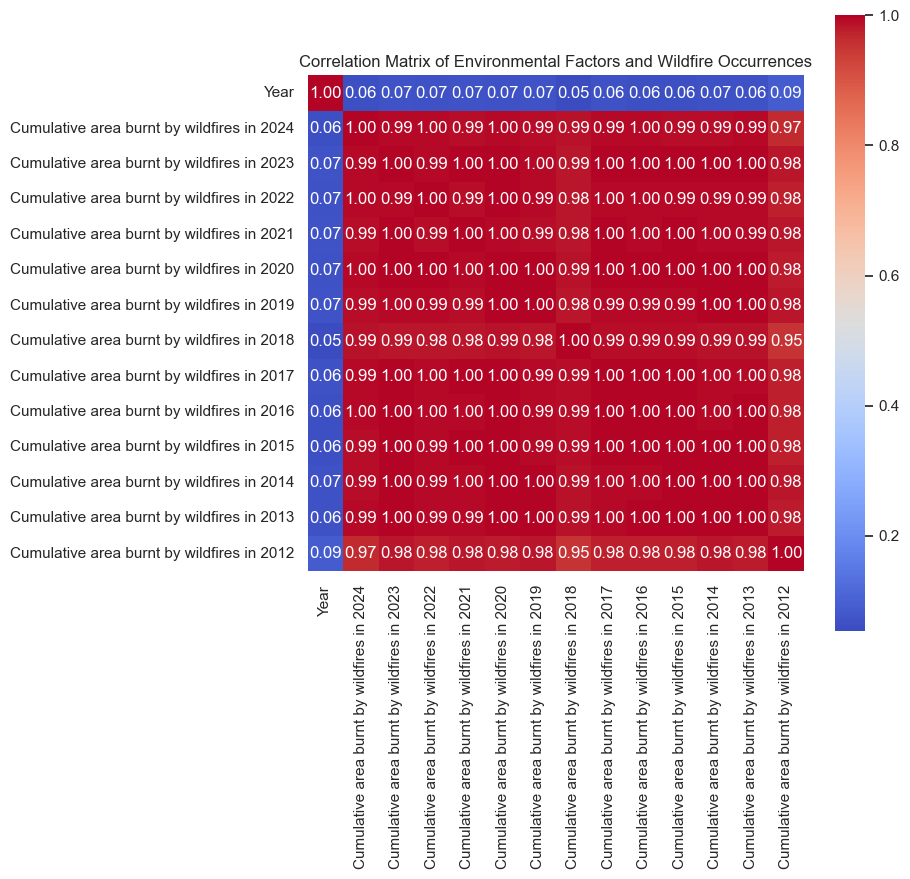

In [31]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Environmental Factors and Wildfire Occurrences')
plt.show()

In [16]:
# Example: Scatter plot between Entity and area burnt 
if data['Year'].dtype in ['float64', 'int64'] and data['Entity'].dtype in ['float64', 'int64']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='Entity', y='Year')
    plt.title('Year vs. Entity')
    plt.xlabel('Entity')
    plt.ylabel('Year')
    plt.show()
else:
    print("The columns 'Entity' and 'Year' are not both numeric. A scatter plot may not be suitable.")

The columns 'Entity' and 'Year' are not both numeric. A scatter plot may not be suitable.


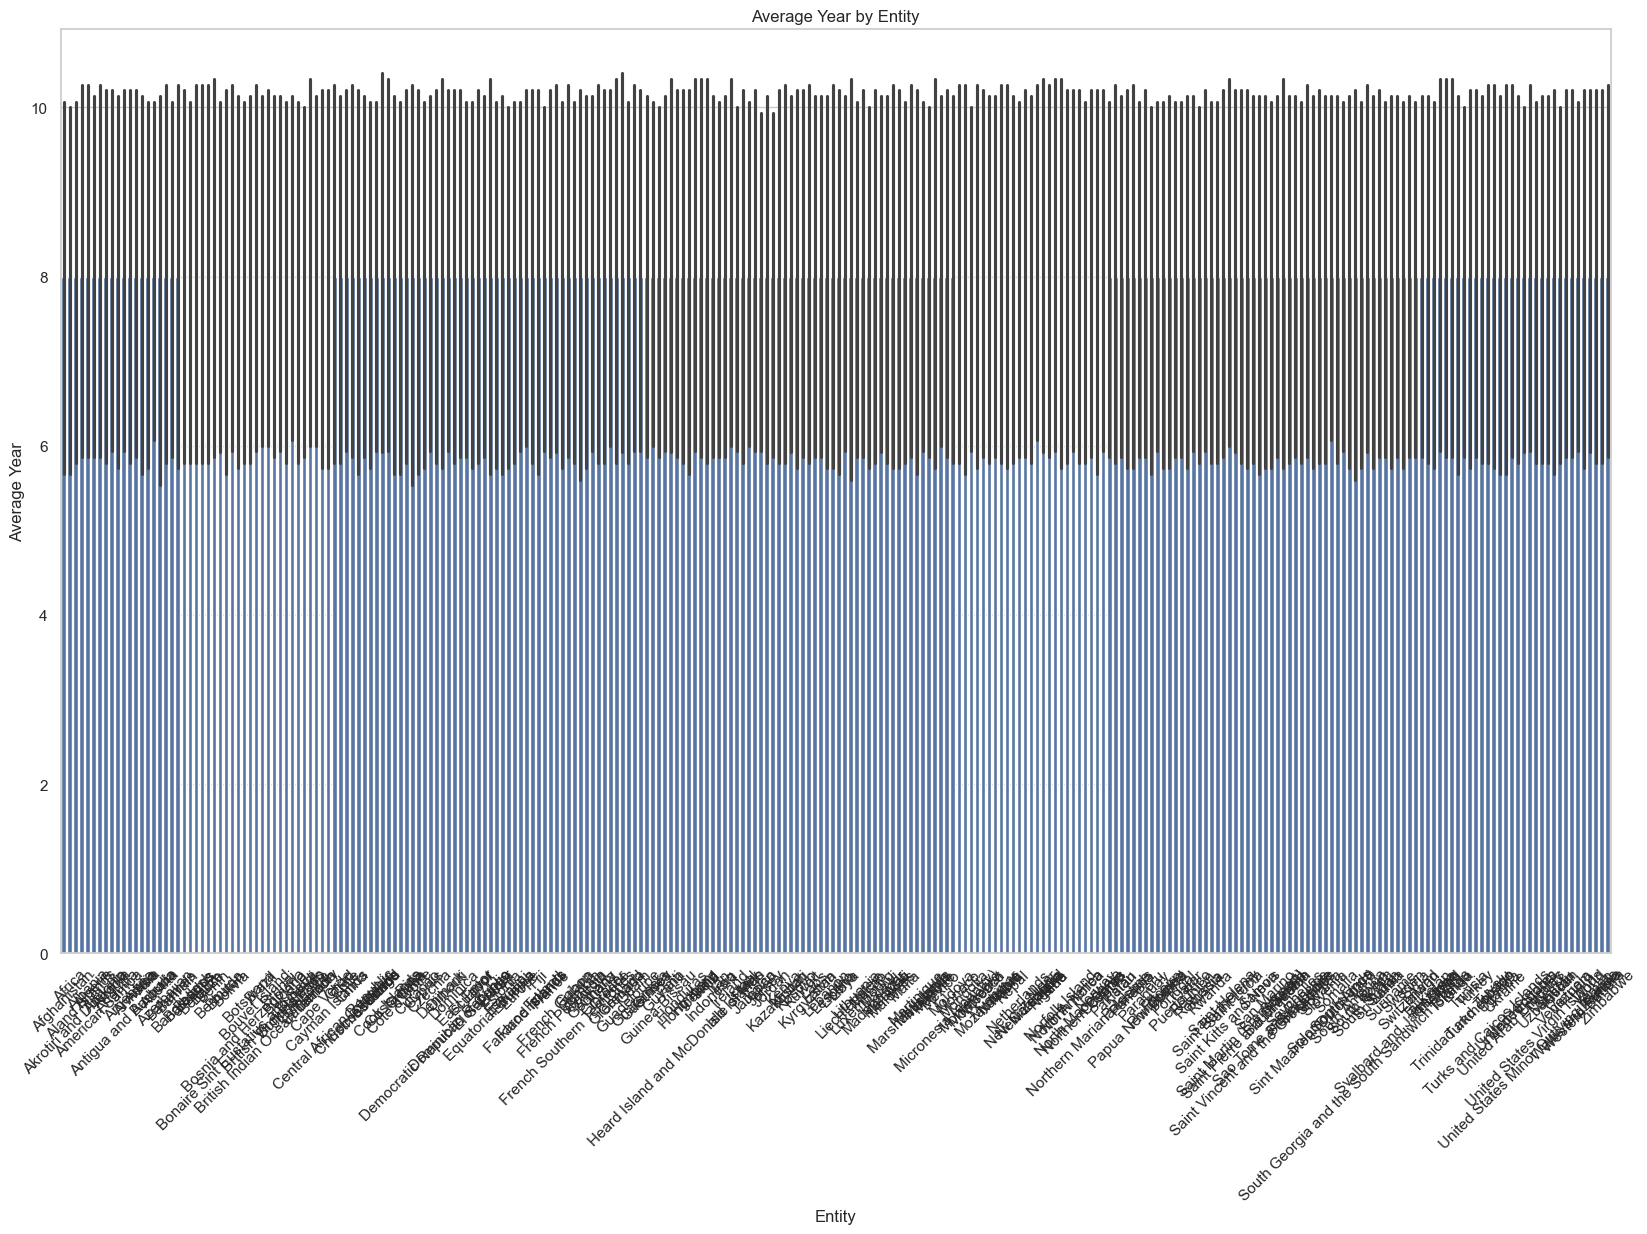

In [17]:
if data['Entity'].dtype == 'object' and data['Year'].dtype in ['float64', 'int64']:
    plt.figure(figsize=(20, 12))
    sns.barplot(data=data, x='Entity', y='Year', estimator='mean')
    plt.title('Average Year by Entity')
    plt.xlabel('Entity')
    plt.ylabel('Average Year')
    plt.xticks(rotation=45)  
    plt.show()
else:
    print("Cannot create a bar plot with the selected columns.")

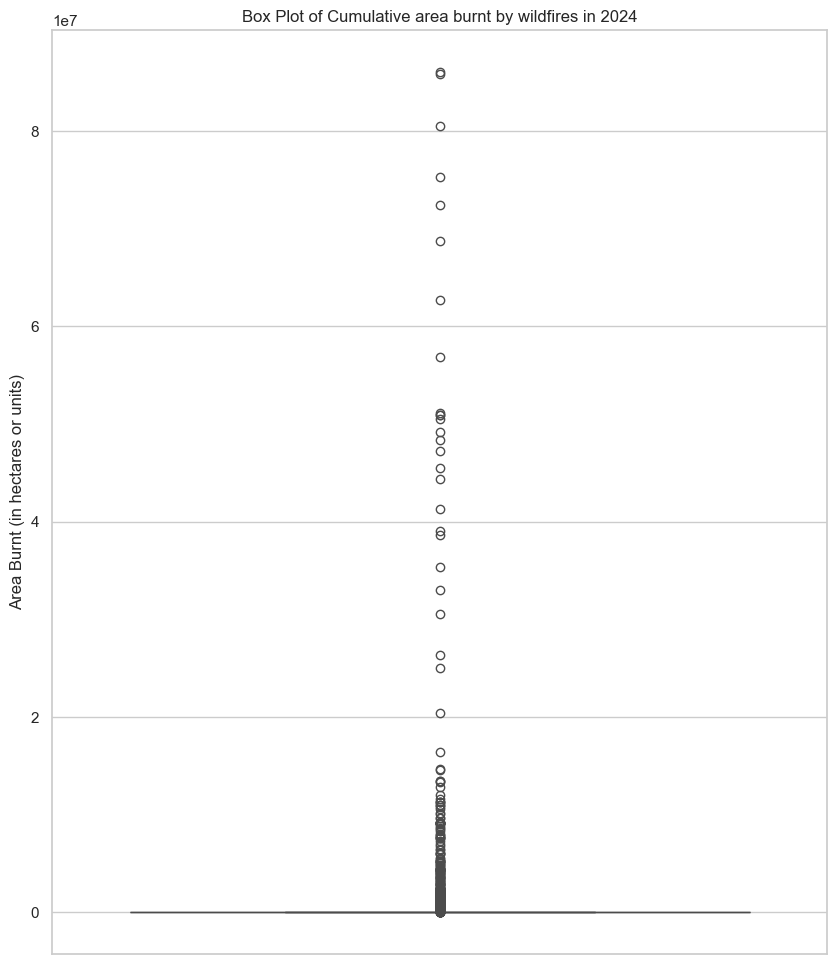

In [18]:
column_to_plot = 'Cumulative area burnt by wildfires in 2024'

# Create a box plot using Seaborn
plt.figure(figsize=(10,12)) 
sns.boxplot(data=data, y=column_to_plot) 
plt.title(f'Box Plot of {column_to_plot}')
plt.ylabel('Area Burnt (in hectares or units)')  
plt.show()

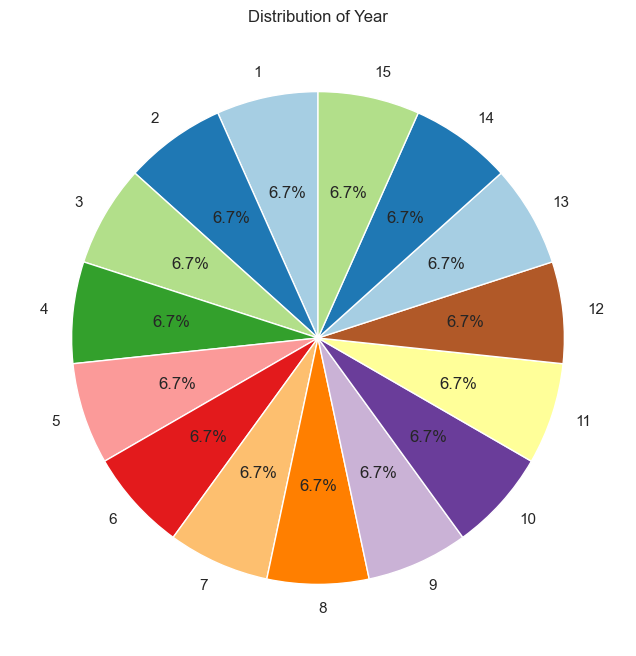

In [19]:
column_to_plot = 'Year'

# Count the occurrences of each unique value in the chosen column
category_counts = data[column_to_plot].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Title and display the plot
plt.title(f'Distribution of {column_to_plot}')
plt.ylabel('')  # Remove the ylabel to avoid unnecessary label
plt.show()

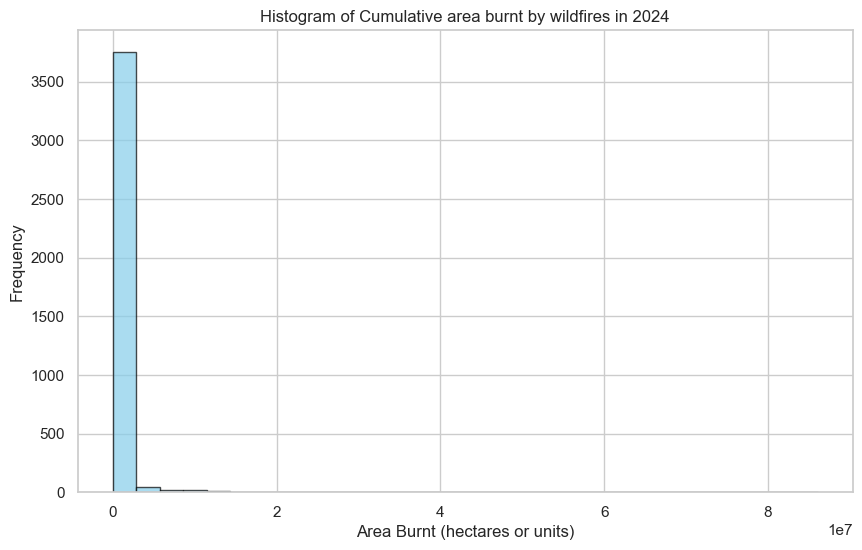

In [32]:

column_to_plot = 'Cumulative area burnt by wildfires in 2024'

# Create the histogram using Matplotlib or Pandas' built-in plotting
plt.figure(figsize=(10,6))  
data[column_to_plot].plot(kind='hist', bins=30, edgecolor='black', color='skyblue', alpha=0.7)

# Title and labels
plt.title(f'Histogram of {column_to_plot}')
plt.xlabel('Area Burnt (hectares or units)')  # Adjust the label based on your column
plt.ylabel('Frequency')

# Display the plot
plt.show()

MACHINE LEARNING

In [21]:
# Convert categorical columns to numeric using One-Hot Encoding
# You can list all categorical columns or automatically detect them

categorical_cols = data.select_dtypes(include=['object']).columns  # Detect all categorical columns
print(f"Categorical columns: {categorical_cols}")

# Apply one-hot encoding
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Define features and target variable
X = data.drop(columns=['Cumulative area burnt by wildfires in 2024'])  # features
y = data['Cumulative area burnt by wildfires in 2024']  # target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model (using Linear Regression as an example)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Output evaluation results
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Optionally, print model coefficients
print("Model Coefficients: ", model.coef_)

Categorical columns: Index(['Entity', 'Code'], dtype='object')
Mean Squared Error: 25059301830.20005
Root Mean Squared Error: 158301.30078492739
R-squared: 0.999333377382855
Model Coefficients:  [ 1.60679675e+03 -7.16882658e+05  2.26685514e+06  6.52276698e+05
  2.25498524e+06  1.69226376e+06 -6.19418996e+05 -2.19223089e+06
  1.11849854e+06  7.17593083e+05 -1.26671837e+06  1.41989592e+06
 -1.33277726e+06 -5.63767143e+16 -1.67887696e+17  7.83664658e+17
  3.42532133e+17 -6.56681389e+16 -7.95835712e+17  5.75039966e+16
 -1.92145490e+18  1.58277067e+17 -1.40100066e+17 -3.58314843e+17
  9.57273145e+17 -5.63767143e+16 -5.14813485e+16 -2.55258526e+18
  2.38010099e+17 -2.23377007e+17  6.16595097e+17 -1.65470879e+17
 -4.45779816e+17  6.96442570e+17  1.09915476e+18  1.32227485e+16
  1.42871059e+17  3.50320171e+17  5.37965855e+17 -4.16785003e+17
  3.87469306e+17  1.68218273e+18 -1.04960848e+18  9.95275912e+17
  1.12395205e+18 -1.48042065e+18 -6.54642086e+17  7.30750744e+17
  1.94521737e+17  4.85142

A/B Testing Example with Python (Using a t-test)

Group A Conversion Rate: 0.0180
Group B Conversion Rate: 0.0350
T-statistic: -2.3688
P-value: 0.0179


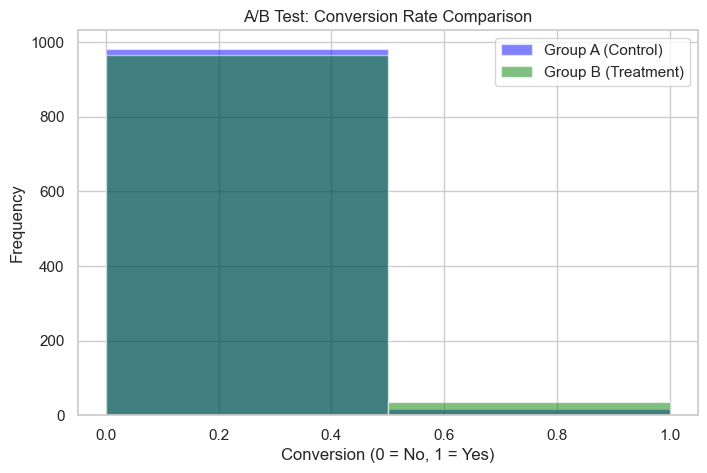

The difference between Group A and Group B is statistically significant!


In [22]:
# Simulate conversion rates data for A/B test
# For example, 1000 visitors in each group, and the conversion rate is between 1% to 5% for each group

np.random.seed(42)  # For reproducibility

# Simulating conversion rates (conversion = 1 means the visitor converted, 0 means they did not)
group_a_conversions = np.random.binomial(1, 0.02, 1000)  # 2% conversion rate in Group A
group_b_conversions = np.random.binomial(1, 0.03, 1000)  # 3% conversion rate in Group B

# Calculate conversion rates
conversion_rate_a = group_a_conversions.mean()
conversion_rate_b = group_b_conversions.mean()

print(f'Group A Conversion Rate: {conversion_rate_a:.4f}')
print(f'Group B Conversion Rate: {conversion_rate_b:.4f}')

# Conduct a t-test to check if the difference between the two groups is statistically significant
t_stat, p_value = stats.ttest_ind(group_a_conversions, group_b_conversions)

print(f'T-statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')

# Visualize the conversion rates for both groups
plt.figure(figsize=(8, 5))
plt.hist(group_a_conversions, bins=2, alpha=0.5, label='Group A (Control)', color='blue')
plt.hist(group_b_conversions, bins=2, alpha=0.5, label='Group B (Treatment)', color='green')
plt.legend()
plt.title("A/B Test: Conversion Rate Comparison")
plt.xlabel('Conversion (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.show()

# Check if the difference is statistically significant
alpha = 0.05  # Significance level (5%)

if p_value < alpha:
    print("The difference between Group A and Group B is statistically significant!")
else:
    print("The difference between Group A and Group B is not statistically significant.")

Power Analysis

In [23]:
from statsmodels.stats.power import TTestIndPower

# Set parameters
effect_size = 0.2  # Small effect size
alpha = 0.05  # 5% significance level
power = 0.8  # Desired power (80%)

# Calculate sample size
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)
print(f'Required sample size per group: {sample_size:.0f}')

Required sample size per group: 393


In [24]:
print("\nNormality Test (Shapiro-Wilk):")
stat, p_value = stats.shapiro(data['Cumulative area burnt by wildfires in 2023'])  # Test normality for the target variable
print(f"Shapiro-Wilk Stat: {stat:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Data is not normally distributed.")
else:
    print("Data is normally distributed.")


Normality Test (Shapiro-Wilk):
Shapiro-Wilk Stat: 0.1100, p-value: 0.0000
Data is not normally distributed.


In [25]:
#Descriptive Statistics
print("Descriptive Statistics:")
print(data.describe())  # Mean, Std, Min, Max, 25th, 50th, and 75th percentiles
print("\nSkewness and Kurtosis:")
print(f"Skewness: {data.skew()}")
print(f"Kurtosis: {data.kurt()}")
print("\nCorrelation Matrix:")
print(data.corr())  # Pearson correlation for continuous variables

Descriptive Statistics:
              Year  Cumulative area burnt by wildfires in 2024  \
count  3870.000000                                3.870000e+03   
mean      8.000000                                6.250834e+05   
std       4.321052                                4.542569e+06   
min       1.000000                                0.000000e+00   
25%       4.000000                                0.000000e+00   
50%       8.000000                                1.565000e+02   
75%      12.000000                                1.696175e+04   
max      15.000000                                8.604778e+07   

       Cumulative area burnt by wildfires in 2023  \
count                                3.870000e+03   
mean                                 5.763277e+05   
std                                  4.270699e+06   
min                                  0.000000e+00   
25%                                  0.000000e+00   
50%                                  1.190000e+02   
75%       

In [26]:
#Pearson’s Correlation Test between two continuous variables
print("\nPearson’s Correlation Test between 'Cumulative area burnt by wildfires in 2024' and 'Year':")
stat, p_value = stats.pearsonr(data['Cumulative area burnt by wildfires in 2024'], data['Year'])
print(f"Correlation Coefficient: {stat:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("There is a significant linear correlation.")
else:
    print("No significant linear correlation.")


Pearson’s Correlation Test between 'Cumulative area burnt by wildfires in 2024' and 'Year':
Correlation Coefficient: 0.0620, p-value: 0.0001
There is a significant linear correlation.


In [27]:
# T-test (Independent)
# Let's assume 'area_burnt' is our target, and we want to compare the means of two groups
group_a = data[data['Year'] == 'Group A']['Cumulative area burnt by wildfires in 2024']
group_b = data[data['Year'] == 'Group B']['Cumulative area burnt by wildfires in 2024']
print("\nT-test (Independent): Comparing 'area_burnt' between Group A and Group B:")
t_stat, p_value = stats.ttest_ind(group_a, group_b)
print(f"T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("The difference between the two groups is statistically significant.")
else:
    print("The difference between the two groups is not statistically significant.")


T-test (Independent): Comparing 'area_burnt' between Group A and Group B:
T-statistic: nan, p-value: nan
The difference between the two groups is not statistically significant.


In [28]:
data.to_json('your_data.json', orient='records', lines=True)